In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [14]:
data = pd.read_csv(r'C:\Users\Kofi Okwan Ocran\Desktop\Azubi\Project Work\data.csv')
data.head(5)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
Region          3756 non-null object
District        3756 non-null object
FacilityName    3756 non-null object
Type            3756 non-null object
Town            3603 non-null object
Ownership       3756 non-null object
Latitude        3732 non-null float64
Longitude       3732 non-null float64
dtypes: float64(2), object(6)
memory usage: 234.8+ KB


In [16]:
data.isnull().sum()

Region            0
District          0
FacilityName      0
Type              0
Town            153
Ownership         0
Latitude         24
Longitude        24
dtype: int64

In [17]:
data.describe()

,Latitude,Longitude
count,3732.000000,3732.000000
mean,6.955678,-1.074580
std,1.679332,1.021352
min,4.796180,-3.235880
25%,5.687642,-1.809792
50%,6.468705,-1.058117
75%,7.430555,-0.215870
max,11.146670,1.191440


In [18]:
data[pd.isnull(data.Town)].tail(50)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
3615,Western,Wassa West,Teysec Clinic,Clinic,NaN,Private,5.434702,-2.144124
3616,Western,Wassa West,Daamang CHPS,CHPS,NaN,Government,5.434702,-2.144124
3618,Western,Wassa West,G.A.G/A.G.A/A.A.I.L/Sam Jona Clinic,Clinic,NaN,Private,5.434702,-2.144124
3619,Western,Aowin Suaman,Jema CHPS,CHPS,NaN,Government,5.807107,-2.857711
3620,Western,Aowin Suaman,Dadieso Health Centre,Health Centre,NaN,Government,5.807107,-2.857711
3621,Western,Aowin Suaman,Kwasuo/Bantama CHPS,CHPS,NaN,Government,5.807107,-2.857711
3622,Western,Aowin Suaman,SDA Clinic,Clinic,NaN,CHAG,5.807107,-2.857711
3623,Western,Aowin Suaman,Amonie Presby Clinic,Clinic,NaN,CHAG,5.807107,-2.857711
3624,Western,Bibiani-Anhwiaso-Bekwai,Wenchi Clinic,Clinic,NaN,CHAG,6.275227,-2.263039
3626,Western,Bibiani-Anhwiaso-Bekwai,Bekwai Health Centre,Health Centre,NaN,Government,6.275227,-2.263039


In [19]:
data[pd.isnull(data.Latitude)]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
357,Ashanti,Bosome Freho,Dunkura Health Centre,Health Centre,Dunkura,Government,NaN,NaN
358,Ashanti,Bosome Freho,Yapesa St.Mary Clinic,Clinic,Yapesa,CHAG,NaN,NaN
1651,Eastern,Akyemansa,St Johns Clinic,Clinic,Ofoase,CHAG,NaN,NaN
2437,Northern,Gushegu,Nabuli Health Centre,Health Centre,Nabuli,Government,NaN,NaN
2438,Northern,Gushegu,Damakung Clinic,Clinic,Damankung,Government,NaN,NaN
2439,Northern,Gushegu,Gushegu Hospital,Hospital,Gushiegu,Government,NaN,NaN
3416,Western,Nzema East Municipal,Ewuku CHPS,CHPS,Ewuku,Government,NaN,NaN
3417,Western,Nzema East Municipal,Kutukrom Health Centre,Health Centre,Kutukrom,Government,NaN,NaN
3663,Western,Ellembele,Aiyinase Health Centre,Health Centre,Aiyinase,Government,NaN,NaN
3664,Western,Ellembele,Nana Benie M. Clinic,Clinic,NaN,Private,NaN,NaN


In [20]:
data.fillna('None', inplace = True)

In [21]:
data.loc[(data['Town'] == 'None') & (data['Latitude'] == 'None')]

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
3664,Western,Ellembele,Nana Benie M. Clinic,Clinic,None,Private,None,None
3665,Western,Ellembele,A. B. Bokazo Clinic,Clinic,None,Private,None,None
3666,Western,Ellembele,St. Martin de Porres Hospitakl,Hospital,None,CHAG,None,None
3667,Western,Ellembele,Krisan Camp Clinic,Clinic,None,CHAG,None,None
3670,Western,Ellembele,Mobile Clinic,Clinic,None,Government,None,None
3676,Western,Ellembele,NASS SCH Clinic,Clinic,None,Government,None,None
3677,Western,Ellembele,West African Rescue Association Clinic,Clinic,None,Government,None,None
3678,Western,Ellembele,Ellembele District Health Directorate,District Health Directorate,None,Government,None,None


In [22]:
len(data.Region.unique())

10

In [23]:
len(data.District.unique())

171

In [24]:
len(data.Type.unique())

25

In [25]:
len(data.Town.unique())

2447

In [26]:
len(data.Ownership.unique())

12

In [27]:
new_data = data.drop([3664,3665, 3666, 3667, 3670, 3676, 3677, 3678], axis= 0)
new_data

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098
5,Ashanti,Offinso North,Aboffour Health Centre,Health Centre,Aboffour,Government,7.12986,-1.73294
6,Ashanti,Atwima-Nwabiagya,Abuakwa Maternity Home,Maternity Home,Abuakwa,Private,7,-2
7,Ashanti,Atwima-Kwanwoma,Aburaso Methodist clinic,Clinic,Aburaso,CHAG,6.66133,-1.67662
8,Ashanti,Ejisu-Juaben Municipal,Achiase Health Centre,Health Centre,Achiase,Government,6.45543,-1.31004
9,Ashanti,Mampong Municipal,Adidwan Health Centre,Health Centre,Adidwan,Government,7.25163,-1.40278


In [53]:
new_data.groupby('Region').nunique().sort_values('FacilityName')

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
Region,,,,,,,,
Upper West,1,10,160,12,134,4,122,123
Upper East,1,10,227,14,180,4,210,208
Northern,1,18,260,15,217,4,211,217
Central,1,17,297,17,219,4,194,194
Brong Ahafo,1,25,310,15,198,7,250,250
Eastern,1,22,387,11,312,5,336,338
Volta,1,15,394,13,294,5,295,295
Western,1,20,464,12,313,6,306,302
Greater Accra,1,7,484,14,235,6,419,419


In [101]:
'''START HERE'''

Central = new_data.loc[new_data['Region'] == 'Central']
Central.Town.value_counts(ascending = True).tail(60)

Abeyee                1
Eyisam                1
Essuehyia             1
Kromaim               1
Bedum                 1
Efutu                 1
Aburansa              1
Jakai                 1
Mensakrom             1
Ansaful               1
Dominase              1
Hemang                1
Nsanfo                1
Yeboah                1
Abigyakwa             1
Amoabeng              1
Breman Amanfopong     1
Opponso               1
Ankamu                1
Potsin                1
Nkum                  1
Awisem                1
Budumburam Camp       1
Eshiem                1
Akropong Odumasi      1
Ayipey                1
Buduatta              1
Abura Gyabankrom      1
Ajumako Ba            1
Nkanfoa               1
Upper Bobikuma        1
Saltpond              2
Foso                  2
North OLA             2
Fetteh                2
Assin Praso           2
Bawjiase              2
Abaasa                2
Nyanyano              2
Ajumako               2
Mankoadze             2
Asikuma         

In [41]:
'''IGNORE THIS'''

def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

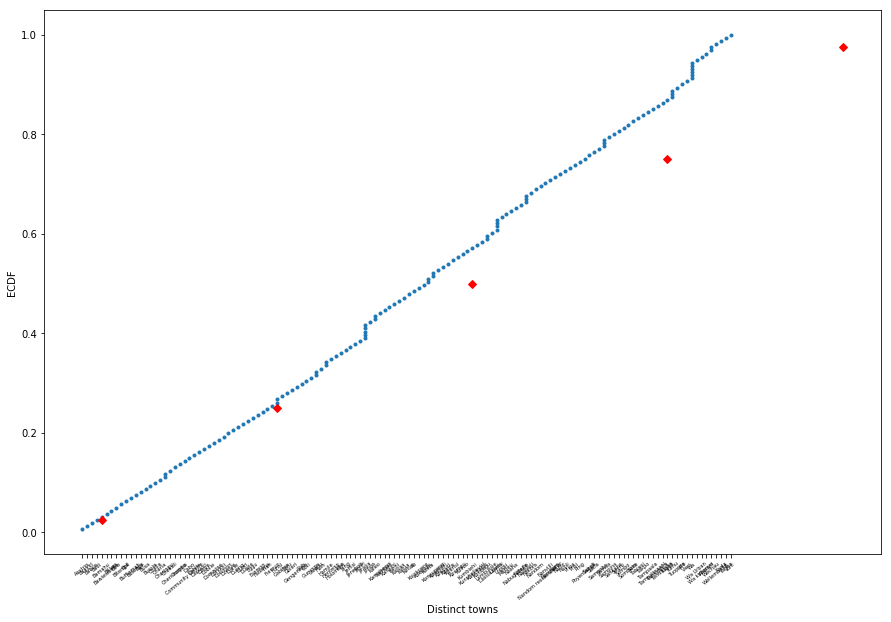

In [70]:
plt.figure(figsize=(15,10))

x_values, y_values = ecdf(Upper_West.Town)
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Distinct towns')
_ = plt.xticks(rotation=40, fontsize = 5)
_ = plt.ylabel('ECDF')


# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_towns = np.percentile(range(len(Upper_West.Town)), percentiles)
_ = plt.plot(ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

In [57]:
Central.Type.value_counts(ascending = False)

CHPS                               98
Clinic                             65
Health Centre                      54
Maternity Home                     30
District Health Directorate        12
Hospital                           10
RCH                                 9
District Hospital                   8
Training Institution                5
Metropolitan Health Directorate     1
Psychiatric Hospital                1
Regional Health Directorate         1
Metropolitan Hospital               1
DHD                                 1
Regional Hospital                   1
Municipal  Health Directorate       1
Polyclinic                          1
Name: Type, dtype: int64

In [77]:
CHPS = Central.loc[(Central['Type'] == 'CHPS')]
Clinic = Central.loc[(Central['Type'] == 'Clinic')]
Health_centre = Central.loc[(Central['Type'] == 'Health Centre')]
Maternity_home = Central.loc[(Central['Type'] == 'Maternity_home')]
DHD = Central.loc[(Central['Type'] == 'District Health Directorate')]
Hospital = Central.loc[(Central['Type'] == 'Hospital')]
RCH = Central.loc[(Central['Type'] == 'RCH')]
District_hospital = Central.loc[(Central['Type'] == 'District Hospital')][:3]
b = pd.concat([CHPS, Clinic, Health_centre, Maternity_home, DHD, Hospital, RCH, District_hospital])

In [78]:
a = Central.Ownership.value_counts(ascending = False)
a

Government          226
Private              55
CHAG                 16
Quasi-Government      2
Name: Ownership, dtype: int64

TypeError: unhashable type: 'numpy.ndarray'

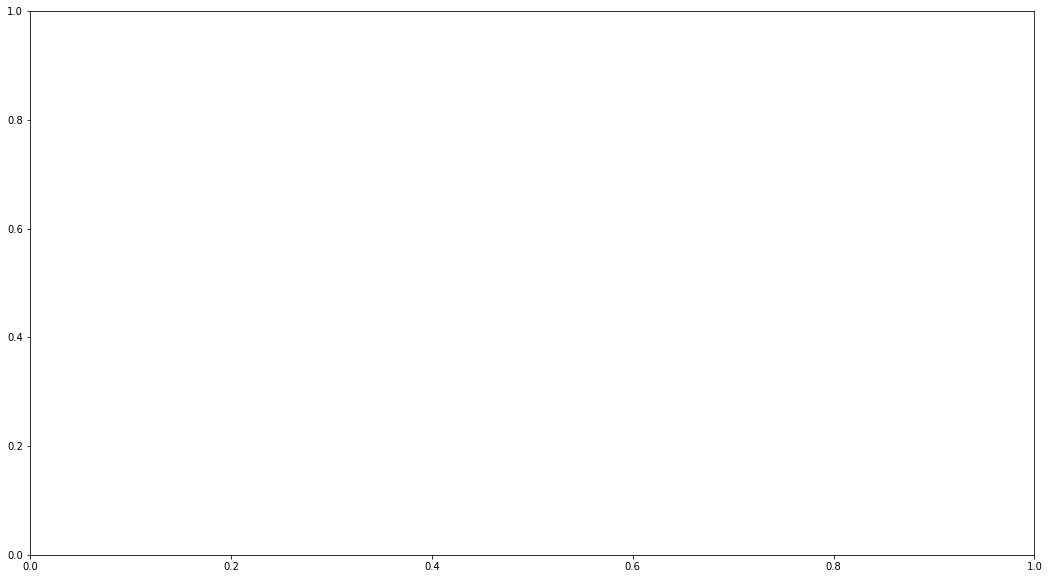

In [79]:
plt.figure(figsize=(18,10))
plt.scatter(a, b)
plt.title('Contribution of Population Size to Infection Rate', fontsize=26)
plt.xlabel('Population Size', fontsize=22)
plt.xticks(fontsize = 16)
plt.ylabel('Total Cases', fontsize=22)
plt.yticks(fontsize = 16)
plt.grid()

In [80]:
corr, _ = pearsonr(b, a)
print('Pearsons correlation: %.3f' % corr)

ValueError: x and y must have the same length.

In [89]:
Northern = new_data.loc[new_data['Region'] == 'Northern']
Northern.Town.value_counts(ascending = True)

Bamboi        1
Bunjai        1
Welensi       1
Zogyele       1
Gbulun        1
             ..
Bunkpurugu    3
Sabonjida     4
Savelugu      4
Yendi         5
Sawla         5
Name: Town, Length: 217, dtype: int64

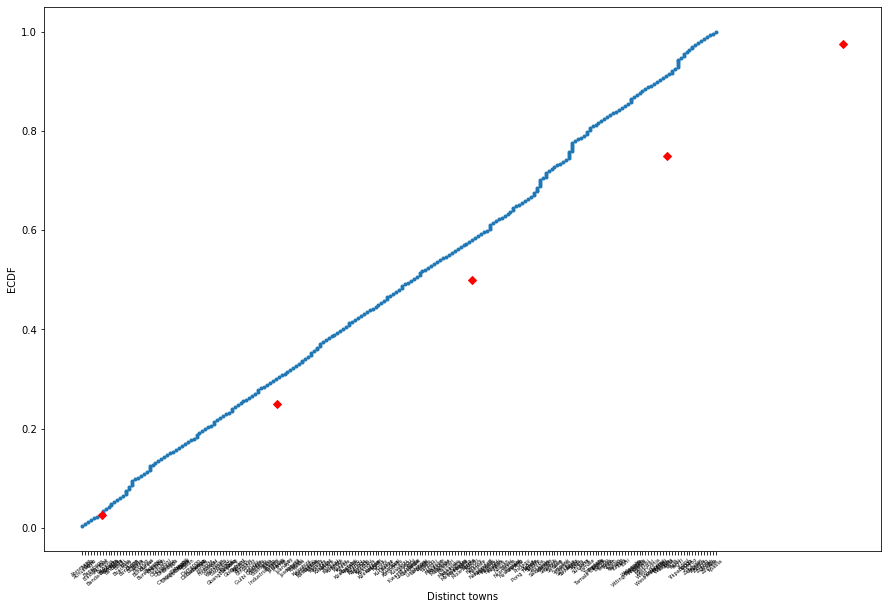

In [90]:
plt.figure(figsize=(15,10))

x_values, y_values = ecdf(Northern.Town)
# Plot the ECDF
_ = plt.plot(x_values, y_values, '.')
_ = plt.xlabel('Distinct towns')
_ = plt.xticks(rotation=40, fontsize = 5)
_ = plt.ylabel('ECDF')


# Overlay percentiles as red x's
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_towns = np.percentile(range(len(Northern.Town)), percentiles)
_ = plt.plot(ptiles_towns, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

In [91]:
Northern.Type.value_counts(ascending = False)

Health Centre                      108
CHPS                                81
District Health Directorate         17
Clinic                              16
District Hospital                   10
Hospital                             8
RCH                                  7
Training Institution                 7
Maternity Home                       6
Polyclinic                           2
Regional Hospital                    1
Regional Health Directorate          1
Metropolitan Health Directorate      1
Others                               1
Teaching Hospital                    1
Name: Type, dtype: int64